<a href="https://colab.research.google.com/github/tiwaryanwesha23/Collaborative_filter/blob/main/User_User_similarity_and_Item_Item_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import math
import itertools
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/data/users.csv')
data1.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/data/movies.csv')
data2.head()

,index,movieId,title,genre
0,1,1,Toy Story (1995),Animation|Children's|Comedy
1,2,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,3,Grumpier Old Men (1995),Comedy|Romance
3,4,4,Waiting to Exhale (1995),Comedy|Drama
4,5,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/data/ratings.csv')
data3.head()


,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
ratings_mat = data3.to_numpy()
print(ratings_mat)

[[   1 1193    5]
 [   1  661    3]
 [   1  914    3]
 ...
 [6040  562    5]
 [6040 1096    4]
 [6040 1097    4]]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

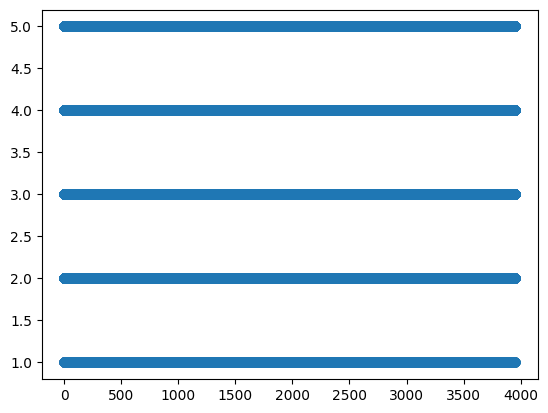

In [ ]:
plt.scatter(data3['movieId'],data3['rating'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data3, test_size=0.3, random_state= 42)
X_train

,userId,movieId,rating
539061,3314,2787,2
6514,48,647,3
623156,3770,1079,4
77441,524,1126,1
559047,3434,2470,3
...,...,...,...
259178,1586,1077,5
365838,2129,2700,5
131932,854,3102,3
671155,4033,3479,5


In [ ]:
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda X: 0 if X > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda X: 1 if X > 0 else 0)

In [ ]:
# The movies not rated by user is marked as 1 for prediction
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [ ]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
dummy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Item-Item Similarity matrix
# Using Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.05911094 0.1499605  ... 0.         0.18887469 0.11312597]
 [0.05911094 1.         0.12793025 ... 0.06054493 0.03078051 0.16222818]
 [0.1499605  0.12793025 1.         ... 0.12020747 0.08261493 0.05281534]
 ...
 [0.         0.06054493 0.12020747 ... 1.         0.08991952 0.05561776]
 [0.18887469 0.03078051 0.08261493 ... 0.08991952 1.         0.15015624]
 [0.11312597 0.16222818 0.05281534 ... 0.05561776 0.15015624 1.        ]]
(6040, 6040)


In [ ]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[773.94212765, 184.36180516, 116.65478389, ...,  13.50560324,
          9.13086151,  95.15181924],
       [826.29109422, 227.19981215, 160.28583751, ...,  21.64492987,
         11.11931854, 138.20740561],
       [718.88634986, 192.97380003, 125.89644477, ...,  16.16363324,
          8.50737381, 100.58247432],
       ...,
       [328.68560552,  76.143085  ,  54.1129464 , ...,   8.21679171,
          4.07033914,  48.44097614],
       [567.15634623, 151.5289106 ,  96.412195  , ...,  14.52575068,
          8.32549188,  84.23728705],
       [967.47325915, 237.36133018, 159.09681025, ...,  28.43948759,
         16.50491559, 170.606765  ]])

In [ ]:
user_predicted_ratings.shape

(6040, 3664)

In [ ]:
# np.multiply for cell-by-cell multiplication

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,184.361805,116.654784,35.261115,79.429517,242.477562,128.399413,16.818036,19.391672,217.853231,...,23.494132,1.463104,3.750692,11.485642,10.039410,221.529657,86.246270,13.505603,9.130862,95.151819
2,826.291094,227.199812,160.285838,49.469445,108.030142,423.404675,173.040885,19.256149,38.219584,365.308094,...,30.088966,1.764876,3.335177,20.536765,18.970030,290.486561,120.695359,21.644930,11.119319,138.207406
3,718.886350,192.973800,125.896445,34.067001,81.363559,312.731462,128.864713,15.882617,26.351170,282.824098,...,25.148510,1.526688,3.405300,15.833547,15.907401,238.367656,93.498780,16.163633,8.507374,100.582474
4,470.610840,130.891140,80.793246,20.970596,49.282194,249.904356,76.882797,9.480019,21.480169,219.874551,...,15.900922,1.044910,2.012072,11.602240,11.692281,152.345678,67.859842,11.787495,5.999083,71.616454
5,669.045539,170.781822,121.488345,42.125473,80.992114,351.383919,130.362671,15.401288,25.294988,256.006027,...,30.954503,1.833018,2.442516,17.313455,15.527006,264.637030,130.923141,20.454542,11.391748,129.741681


In [ ]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
2858    713.352352
2762    566.594554
260     490.704876
1196    487.088637
2028    480.967961
Name: 43, dtype: float64

In [ ]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.25519516 0.20602029 ... 0.06501358 0.02362314 0.10434952]
 [0.25519516 1.         0.18815341 ... 0.09391168 0.01787136 0.07696822]
 [0.20602029 0.18815341 1.         ... 0.05997499 0.00628029 0.07657937]
 ...
 [0.06501358 0.09391168 0.05997499 ... 1.         0.07685889 0.10068379]
 [0.02362314 0.01787136 0.00628029 ... 0.07685889 1.         0.11980159]
 [0.10434952 0.07696822 0.07657937 ... 0.10068379 0.11980159 1.        ]]
- - - - - - - - - - 
(3664, 3664)


In [ ]:
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[ 47.08958168,  31.62733207,  23.16497728, ...,   9.08366245,
          5.27815591,  16.9116795 ],
       [ 83.15459759,  62.41200828,  50.15007702, ...,  25.39725752,
          9.50835877,  40.77584055],
       [ 40.59637607,  29.86187184,  23.14153741, ...,  10.11361905,
          4.00643287,  16.12863605],
       ...,
       [ 14.38664215,   9.19215454,   7.38708945, ...,   4.24705064,
          1.93142155,   6.53720182],
       [ 67.32804206,  48.74478513,  36.00914251, ...,  19.97735309,
          9.02009889,  29.77028891],
       [173.169741  , 117.49951049,  87.57258192, ...,  61.01804155,
         31.15875864,  92.47637647]])

In [ ]:
'''
item_predicted_ratings = np.dot(item_similarity, movie_features).T
item_predicted_ratings
'''

'\nitem_predicted_ratings = np.dot(item_similarity, movie_features).T\nitem_predicted_ratings\n'

In [ ]:
item_predicted_ratings.shape

(6040, 3664)

In [ ]:
dummy_train.shape

(6040, 3664)

In [ ]:
# np.multiply for cell-by-cell multiplication

item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,31.627332,23.164977,16.061739,22.414035,26.776793,25.937627,10.336430,10.381895,28.935871,...,10.330040,3.257014,6.028818,6.929909,6.195215,25.391754,17.602452,9.083662,5.278156,16.911679
2,83.154598,62.412008,50.150077,34.439759,47.255803,73.315108,54.429489,18.624310,31.319746,75.425968,...,21.993437,6.252367,8.083699,20.804340,19.594851,54.550270,40.081460,25.397258,9.508359,40.775841
3,40.596376,29.861872,23.141537,13.982728,20.961785,31.828629,23.287126,8.617232,13.628920,33.801177,...,10.008234,2.663408,4.847703,9.147981,8.291879,25.496254,17.138246,10.113619,4.006433,16.128636
4,18.355682,13.224289,9.568322,5.562286,8.507380,16.317151,9.447961,3.431102,6.525844,17.032510,...,4.510273,1.349916,1.783482,4.233709,4.698026,10.703924,8.456363,4.944771,2.079181,8.022610
5,77.273776,54.488994,43.614621,35.565569,40.249405,68.979992,49.660435,18.673082,23.184477,60.723559,...,27.180671,8.034632,6.972204,22.049520,20.410714,58.948941,53.944359,28.690413,13.771469,45.177572


In [ ]:
item_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
2858    17.842266
2762    17.792558
2716    17.083950
1265    16.629565
2355    16.401318
Name: 43, dtype: float64

# Using User-User **similarity**

In [ ]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.0623583  0.         ... 0.         0.         0.0248017 ]
 [0.0623583  1.         0.05395974 ... 0.         0.         0.02746747]
 [0.         0.05395974 1.         ... 0.         0.         0.02012002]
 ...
 [0.         0.         0.         ... 1.         0.23441952 0.02606513]
 [0.         0.         0.         ... 0.23441952 1.         0.02501777]
 [0.0248017  0.02746747 0.02012002 ... 0.02606513 0.02501777 1.        ]]
- - - - - - - - - - 
(6040, 6040)


In [ ]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[107.7790623 ,  24.5084213 ,  11.18285678, ...,   2.38442386,
          1.47326943,  15.25879578],
       [126.63444836,  37.54104888,  16.83867203, ...,   2.5042371 ,
          1.75349052,  20.59380983],
       [128.00189858,  36.12664224,  14.80883618, ...,   1.83291978,
          1.35718006,  18.04417335],
       ...,
       [ 47.72448669,  10.84234776,   4.94926067, ...,   1.09062432,
          0.82674568,  10.70349626],
       [116.75858018,  28.39462143,  11.80000595, ...,   3.15775772,
          1.98585124,  19.99915928],
       [172.02631514,  44.59376877,  17.38181338, ...,   4.60386279,
          3.54438266,  31.41375582]])

# Testing on the movies already rated by the **user**

In [ ]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,73.934502,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data3['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy()
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

300063

In [ ]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

1.319211272823791


In [ ]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.079128566293121


# **Using Item-Item Similarity**

In [ ]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.11435575 0.09076879 ... 0.03025513 0.02400591 0.04144476]
 [0.11435575 1.         0.06966911 ... 0.01950294 0.         0.00706432]
 [0.09076879 0.06966911 1.         ... 0.02956173 0.02015728 0.02355714]
 ...
 [0.03025513 0.01950294 0.02956173 ... 1.         0.21495399 0.08905087]
 [0.02400591 0.         0.02015728 ... 0.21495399 1.         0.05797892]
 [0.04144476 0.00706432 0.02355714 ... 0.08905087 0.05797892 1.        ]]
- - - - - - - - - - 
(3531, 3531)


In [ ]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[ 7.91634283,  5.26626901,  3.21110045, ...,  1.520098  ,
         1.12921389,  3.8856403 ],
       [14.69487495, 10.46049831,  6.66945401, ...,  2.8441915 ,
         2.0635246 ,  7.19541614],
       [ 8.04121575,  5.78291797,  3.56071108, ...,  1.09645873,
         0.80145229,  3.49448317],
       ...,
       [ 1.53937738,  0.82796118,  0.56388942, ...,  0.1840254 ,
         0.17437144,  0.89675343],
       [13.44476163,  8.77847279,  5.59234433, ...,  2.79962605,
         1.922207  ,  6.72519788],
       [31.33119153, 20.27697675, 11.9694526 , ...,  7.1888191 ,
         6.32735579, 17.95050973]])

In [ ]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,18.784164,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data3['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy()
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

300063

In [ ]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.3913715831455424


In [ ]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.0852970611283888


## It means that on an average our Item-based recommendation engine is making an error of 2.08 in predicting the User ratings.

Conclusion
# For the give dataset, the User-based collaborative filtering outperformed Item-based collaborative filtering.